# COP Optimization for a Simple Vapor Recompression Cycle

In [1]:
from vapor_compression import SimpleVaporCompressionCycle

## Define the Refridgerant

In [2]:
vc = SimpleVaporCompressionCycle('R134a')

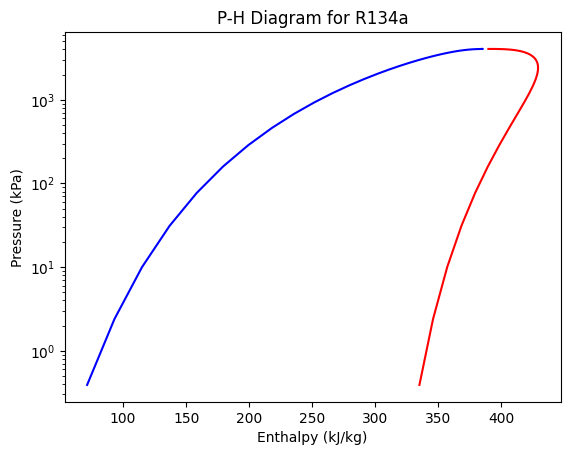

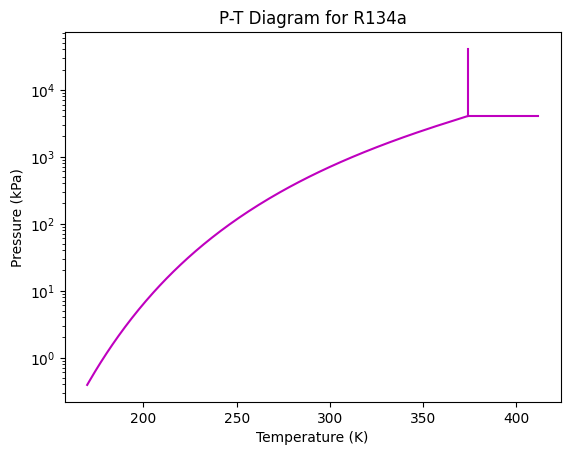

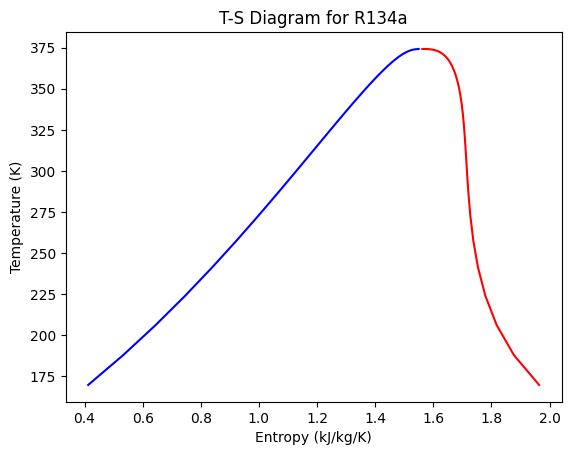

In [3]:
vc.draw_thermodynamic_diagrams()

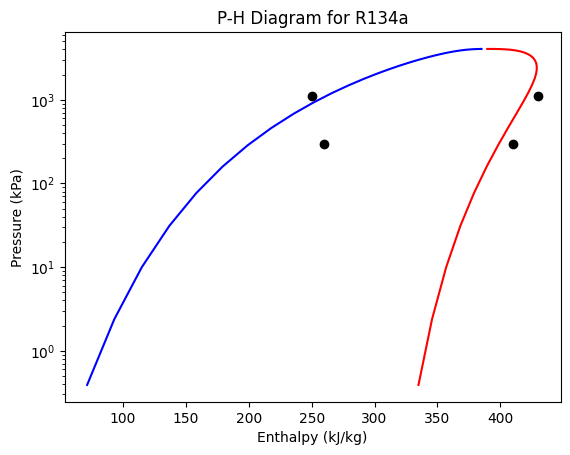

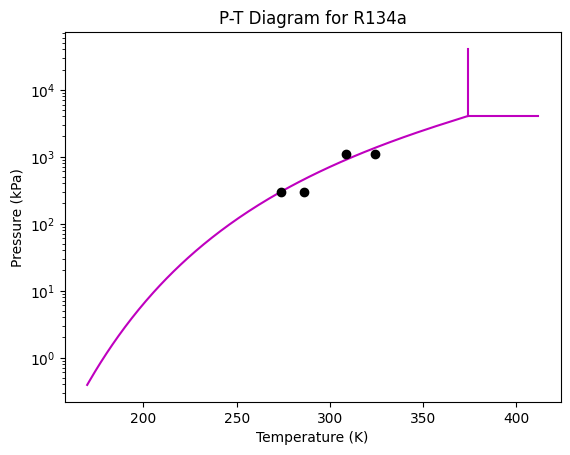

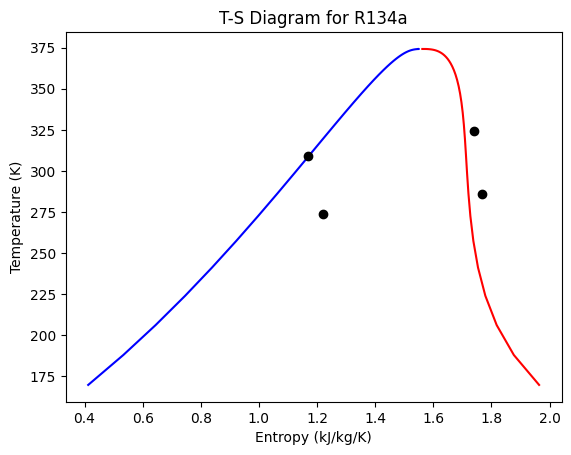

In [4]:
vc.specify_initial_conditions(enthalpy=[410,430,250,260], # kJ/kg
                                pressure=[300,1100,1100,300] # kPa
                                )

## Initialize

In [5]:
vc.initialize(verbose=True)


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 2.0910e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     9.8008     9.8008
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     273.82     286.14
    P                          pascal 3.0000e+05 3.0000e+05
    Vapor Fraction      dimensionless     0.0000     1.0000
    Mass Enthalpy    joule / kilogram 2.0090e+05 4.1000e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------

### Optimize

In [6]:
vc.set_specifications(
    low_side_pressure=(200, 300), # Pa
    high_side_pressure=(1000, 2000), # Pa
    evaporator_temperature=(-20, 10), # degC
    condenser_temperature=(30, 40), # degC
    subcooling = 3, # deg C
    superheating = 3 # deg C
)

# Still need to debug

vc.optimize_COP(verbose=True)

2025-03-10 10:38:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.evaporator.control_volume.heat


2025-03-10 10:38:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.compressor.control_volume.work


2025-03-10 10:38:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.condenser.control_volume.heat


2025-03-10 10:38:42 [WARNING] idaes.core.util.scaling: Missing scaling factor for fs.expansion_valve.control_volume.work


Ipopt 3.13.2: max_iter=500


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation


Flowsheet : fs                                                             Time: 0.0
------------------------------------------------------------------------------------
    Stream Table
                         Units         evaporator_to_compressor  compressor_to_condenser  condenser_to_expansion_valve  expansion_valve_to_evaporator
    Molar Flow          mole / second             9.8008                   9.8008                      9.8008                        9.8008          
    Mass Flow       kilogram / second             1.0000                   1.0000                      1.0000                        1.0000          
    T                          kelvin             279.47                   332.84                      306.84                        272.15          
    P                          pascal         2.8238e+05               1.1053e+06                  1.1053e+06                    2.8238e+05          
    Vapor Fraction      dimensionless             1.0000      

  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.


Ipopt 3.13.2: max_iter=500


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation

  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.


Ipopt 3.13.2: max_iter=500


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation

  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):



Flowsheet : fs                                                             Time: 0.0
------------------------------------------------------------------------------------
    Stream Table
                         Units         evaporator_to_compressor  compressor_to_condenser  condenser_to_expansion_valve  expansion_valve_to_evaporator
    Molar Flow          mole / second             9.8008                   9.8008                      9.8008                        9.8008          
    Mass Flow       kilogram / second             1.0000                   1.0000                      1.0000                        1.0000          
    T                          kelvin             278.92                   330.00                      303.15                        272.16          
    P                          pascal         2.8249e+05               1.0477e+06                  1.0477e+06                    2.8249e+05          

4.878436749062171

Optimized COP: 4.878


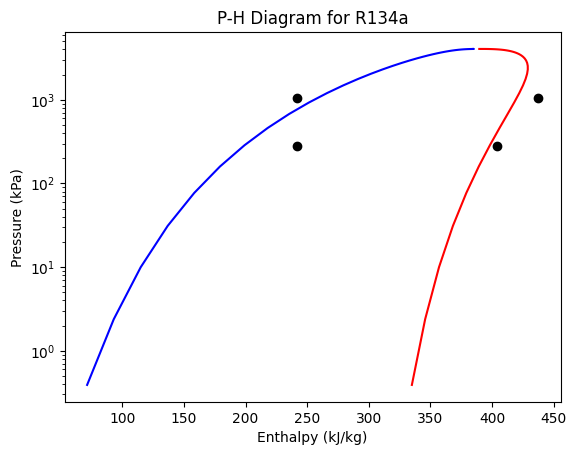

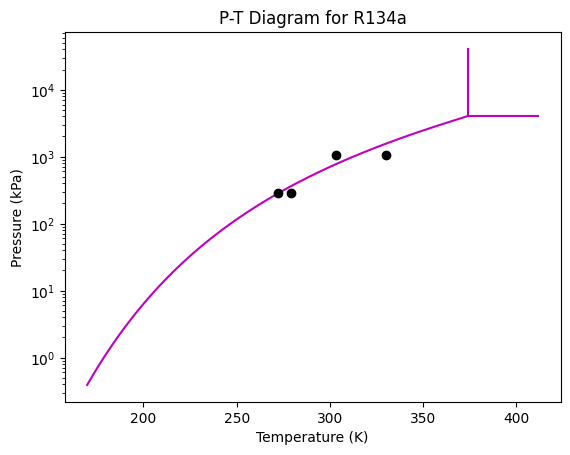

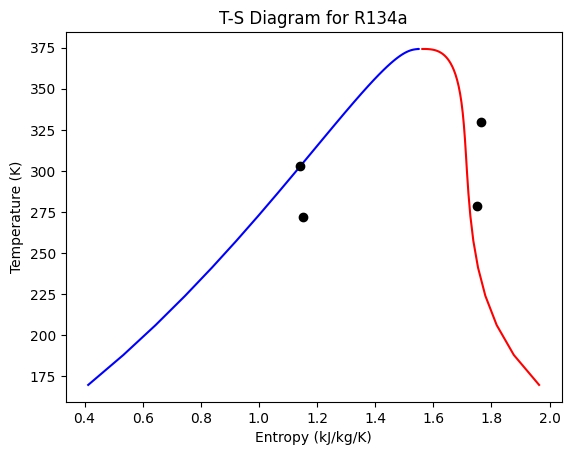


Unit : fs.evaporator                                                       Time: 0.0
------------------------------------------------------------------------------------
    Unit Performance

    Variables: 

    Key       : Value      : Units : Fixed : Bounds
    Heat Duty : 1.6231e+05 :  watt : False : (None, None)

------------------------------------------------------------------------------------
    Stream Table
                         Units           Inlet     Outlet  
    Molar Flow          mole / second     9.8008     9.8008
    Mass Flow       kilogram / second     1.0000     1.0000
    T                          kelvin     272.16     278.92
    P                          pascal 2.8249e+05 2.8249e+05
    Vapor Fraction      dimensionless    0.21592     1.0000
    Mass Enthalpy    joule / kilogram 2.4172e+05 4.0403e+05

Unit : fs.compressor                                                       Time: 0.0
-----------------------------------------------------------------------

In [7]:
vc.report_solution()

In [8]:
'''
for i in dir(vc.model.fs.condenser.control_volume.properties_out[0]):
    print(i)

vc.model.fs.condenser.control_volume.properties_out[0].t_sat_func()
'''


'\nfor i in dir(vc.model.fs.condenser.control_volume.properties_out[0]):\n    print(i)\n\nvc.model.fs.condenser.control_volume.properties_out[0].t_sat_func()\n'

In [9]:
from idaes.core.util import DiagnosticsToolbox

# Create a diagnostics toolbox instance
diag = DiagnosticsToolbox(vc.model, constraint_residual_tolerance=1e-9)

# Run the diagnostics
diag.display_constraints_with_large_residuals()

The following constraint(s) have large residuals (>1.0E-09):




In [10]:
diag.report_numerical_issues()

2025-03-10 10:38:46 [WARNING] idaes.core.util.scaling: Nonsquare Jacobian using pseudo inverse


Model Statistics

    Jacobian Condition Number: 3.447E+09

------------------------------------------------------------------------------------
1 WARNINGS


------------------------------------------------------------------------------------
8 Cautions

    Caution: 3 Variables with value close to their bounds (abs=1.0E-04, rel=1.0E-04)
    Caution: 3 Variables with value close to zero (tol=1.0E-08)
    Caution: 15 Variables with extreme value (<1.0E-04 or >1.0E+04)
    Caution: 11 Constraints with mismatched terms
    Caution: 11 Constraints with potential cancellation of terms
    Caution: 15 Variables with extreme Jacobian values (<1.0E-04 or >1.0E+04)
    Caution: 11 Constraints with extreme Jacobian values (<1.0E-04 or >1.0E+04)
    Caution: 55 extreme Jacobian Entries (<1.0E-04 or >1.0E+04)

------------------------------------------------------------------------------------
Suggested next steps:

    display_variables_at_or_outside_bounds()



In [11]:
diag.display_variables_at_or_outside_bounds()

The following variable(s) have values at or outside their bounds (tol=0.0E+00):

    fs.compressor.control_volume.properties_in[0.0].vapor_frac (free): value=1.0 bounds=(0, 1)
    fs.condenser.control_volume.properties_in[0.0].vapor_frac (free): value=1.0 bounds=(0, 1)
    fs.expansion_valve.control_volume.properties_in[0.0].vapor_frac (free): value=0.0 bounds=(0, 1)



In [12]:
diag.report_numerical_issues()

2025-03-10 10:38:46 [WARNING] idaes.core.util.scaling: Nonsquare Jacobian using pseudo inverse


Model Statistics

    Jacobian Condition Number: 3.447E+09

------------------------------------------------------------------------------------
1 WARNINGS


------------------------------------------------------------------------------------
8 Cautions

    Caution: 3 Variables with value close to their bounds (abs=1.0E-04, rel=1.0E-04)
    Caution: 3 Variables with value close to zero (tol=1.0E-08)
    Caution: 15 Variables with extreme value (<1.0E-04 or >1.0E+04)
    Caution: 11 Constraints with mismatched terms
    Caution: 11 Constraints with potential cancellation of terms
    Caution: 15 Variables with extreme Jacobian values (<1.0E-04 or >1.0E+04)
    Caution: 11 Constraints with extreme Jacobian values (<1.0E-04 or >1.0E+04)
    Caution: 55 extreme Jacobian Entries (<1.0E-04 or >1.0E+04)

------------------------------------------------------------------------------------
Suggested next steps:

    display_variables_at_or_outside_bounds()



In [13]:
diag.report_structural_issues()

Model Statistics

        Activated Blocks: 26 (Deactivated: 0)
        Free Variables in Activated Constraints: 44 (External: 0)
            Free Variables with only lower bounds: 3
            Free Variables with only upper bounds: 1
            Free Variables with upper and lower bounds: 24
        Fixed Variables in Activated Constraints: 2 (External: 0)
        Activated Equality Constraints: 40 (Deactivated: 10)
        Activated Inequality Constraints: 2 (Deactivated: 0)
        Activated Objectives: 1 (Deactivated: 0)

------------------------------------------------------------------------------------
3 WARNINGS

        Under-Constrained Set: 35 variables, 31 constraints
        Over-Constrained Set: 0 variables, 0 constraints

------------------------------------------------------------------------------------
0 Cautions

    No cautions found!

------------------------------------------------------------------------------------
Suggested next steps:

    display_underconstr

## Sensitivity Analysis

In [14]:
run_sensitivity_analysis = True

if run_sensitivity_analysis:
    import numpy as np
    T_ambient = np.linspace(20, 31, 22)

    COP = np.zeros_like(T_ambient)

    for i, Ta in enumerate(T_ambient):
        vc.set_specifications(
            low_side_pressure=(200, 300), # Pa
            high_side_pressure=(1000, 2000), # Pa
            evaporator_temperature=(-30, -10), # degC
            condenser_temperature=(Ta+5, Ta+15), # degC
            subcooling=3,
            superheating=3
        )
        try:
            COP[i] = vc.optimize_COP(verbose=False, initialize=False)
        except:
            COP[i] = np.nan

  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 5.62091E-02
    fs.evaporator.control_volume.properties_out[0.0].eq_complementarity: 1.45253E-06
    fs.compressor.ratioP_calculation[0.0]: 2.47521E-06
    fs.compressor.isentropic_pressure[0.0]: 3.94327E-06
    fs.compressor.state_material_balances[0.0,R134a]: 2.81751E-06
    fs.compressor.isentropic_energy_balance[0.0]: 9.09245E-05
    fs.compressor.actual_work[0.0]: 4.11460E-06
    fs.compressor.control_volume.material_balances[0.0,R134a]: 2.40115E-06
    fs.compressor.control_volume.pressure_balance[0.0]: 2.40177E-06
    fs.compressor.control_volume.properties_out[0.0].eq_complementarity: 1.15888E-06
    fs.condenser.control_volume.properties_out[0.0].eq_complementarity: 1.21459E-06
    fs.expansion_valve.control_volume.pressure_balance[0.0]: 6.05407E-06
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20883E-02
    fs.evaporator_to_compressor_expa

  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 2.40646E-06
    fs.evaporator.control_volume.pressure_balance[0.0]: 2.98039E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20835E-02



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 2.66115E-06
    fs.evaporator.control_volume.pressure_balance[0.0]: 2.20835E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20835E-02



  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 2.66115E-06
    fs.evaporator.control_volume.pressure_balance[0.0]: 2.20835E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20835E-02



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 2.66115E-06
    fs.evaporator.control_volume.pressure_balance[0.0]: 2.20835E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20835E-02



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28018E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.49242E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28019E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.49735E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28019E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.51488E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28018E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.51223E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28019E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.51289E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28018E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.48371E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 2.40660E-06
    fs.evaporator.control_volume.pressure_balance[0.0]: 2.27394E-02
    fs.compressor.isentropic_pressure[0.0]: 1.15423E-04
    fs.expansion_valve.control_volume.pressure_balance[0.0]: 1.05118E-03
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20835E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.96933E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 2.40616E-06
    fs.evaporator.control_volume.pressure_balance[0.0]: 2.27396E-02
    fs.expansion_valve.control_volume.pressure_balance[0.0]: 6.82442E-04
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20835E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.96901E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28021E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.50108E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28024E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.51876E-04



  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28023E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.49730E-04



  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28024E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.49649E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28108E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 2.23279E-04



  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.27840E-02
    fs.evaporator.control_volume.properties_out[0.0].eq_complementarity: 1.44968E-06
    fs.compressor.ratioP_calculation[0.0]: 2.58029E-06
    fs.compressor.isentropic_pressure[0.0]: 3.92028E-06
    fs.compressor.state_material_balances[0.0,R134a]: 2.87990E-06
    fs.compressor.isentropic_energy_balance[0.0]: 1.80487E-04
    fs.compressor.actual_work[0.0]: 4.10396E-06
    fs.compressor.control_volume.material_balances[0.0,R134a]: 2.55361E-06
    fs.compressor.control_volume.pressure_balance[0.0]: 2.26405E-06
    fs.compressor.control_volume.properties_out[0.0].eq_complementarity: 1.14233E-06
    fs.expansion_valve.control_volume.pressure_balance[0.0]: 5.18731E-06
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20883E-02
    fs.evaporator_to_compressor_expanded.vapor_frac_equality[0.0]: 4.45105E-06
    fs.compressor_to_condenser_expanded.p

  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 2.66115E-06
    fs.evaporator.control_volume.pressure_balance[0.0]: 2.20835E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20835E-02



  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.superheating_constraint: 2.66115E-06
    fs.evaporator.control_volume.pressure_balance[0.0]: 2.20835E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20835E-02



  - termination condition: infeasible
  - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
  - termination condition: maxIterations
  - message from solver: Ipopt 3.13.2\x3a Maximum Number of Iterations Exceeded.
ERROR:vapor_compression:Optimization failed


The following constraint(s) have large residuals (>1.0E-06):

    fs.evaporator.control_volume.pressure_balance[0.0]: 2.28018E-02
    fs.evaporator_to_compressor_expanded.pressure_equality[0.0]: 7.20840E-02
    fs.expansion_valve_to_evaporator_expanded.pressure_equality[0.0]: 1.48147E-04



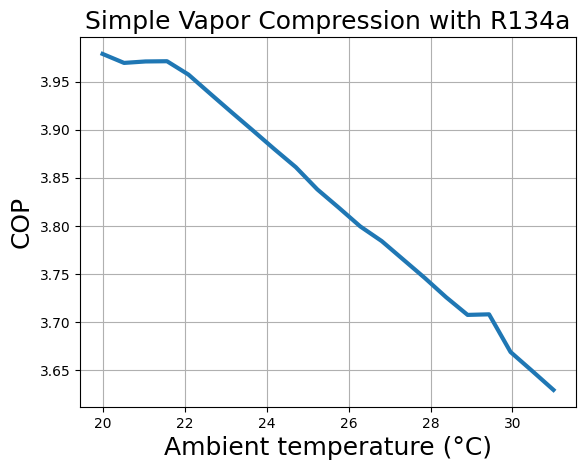

In [15]:
if run_sensitivity_analysis:

    import matplotlib.pyplot as plt
    plt.plot(T_ambient, COP, linewidth=3)
    plt.xlabel('Ambient temperature (°C)', fontsize=18)
    plt.ylabel('COP', fontsize=18)
    plt.title('Simple Vapor Compression with R134a', fontsize=18)
    plt.grid()
    plt.show()